In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style="darkgrid", color_codes=True)

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error

import statsmodels.api as sm

from sklearn.metrics import mean_squared_error
from math import sqrt

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [2]:
!pip install xgboost
import xgboost as xgb
from sklearn.model_selection import GridSearchCV

In [3]:
def plotFor(test,forecasts):
    # Plotting the true values and the predicted values
    plt.figure(figsize=(12, 4))
    plt.plot(test, label='True Values', marker='o')
    plt.plot(forecasts, label='Predicted Values', marker='x')
    plt.title('ARIMA Model Forecast for the Last 24 Observations')
    plt.xlabel('Time')
    plt.ylabel('WTI Price')
    plt.legend()
    plt.show()

def calculateMAE(test, forecasts):
    mae = mean_absolute_error(test, forecasts)
    return mae

def calculateMAPE(test, forecasts):
    percentage_errors = [abs((actual - predicted) / actual) * 100 for actual, predicted in zip(test, forecasts) if actual != 0]
    mape = sum(percentage_errors) / len(percentage_errors)
    return mape

def calculateMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    return mse

def calculateRMSE(test, forecasts):
    mse = mean_squared_error(test, forecasts)
    rmse = sqrt(mse)
    return rmse

In [4]:
df = pd.read_excel("EUNG.xlsx")
df['DATE'] = pd.to_datetime(df['DATE'])
df.set_index('DATE', inplace=True)
df

,EUNG,EUNG_LAG,Equity Market Volatility,Economic Policy Uncertainty Europe,NY Business Conditions,3 Month Treasury Bill,Infectious Disease Tracker,Nickel,COV19,RUWAR
DATE,,,,,,,,,,
2001-10-01,-0.154151,0.000000,22.46,141.35,-4.5,-0.72,0.39,-0.088497,0,0
2001-11-01,0.000000,-0.154151,-13.09,-10.39,-2.2,-0.48,-0.06,-0.045894,0,0
2001-12-01,-0.006192,0.000000,-2.94,-39.39,-6.8,-0.29,0.09,0.060355,0,0
2002-01-01,-0.143340,-0.006192,-2.04,-53.76,11.7,-0.18,-0.39,0.035324,0,0
2002-02-01,0.000000,-0.143340,4.29,-5.87,11.2,-0.04,0.29,0.131247,0,0
...,...,...,...,...,...,...,...,...,...,...
2023-06-01,0.031592,-0.316354,2.93,21.28,-42.6,0.22,2.32,-0.071308,1,1
2023-07-01,-0.068368,0.031592,-5.14,-18.30,38.4,0.02,-2.45,-0.041580,1,1
2023-08-01,0.109307,-0.068368,-0.72,16.36,-5.5,0.09,-0.81,-0.006711,1,1


In [5]:
y = df['EUNG']
X = df[["EUNG_LAG","Equity Market Volatility","Economic Policy Uncertainty Europe","NY Business Conditions","3 Month Treasury Bill","Infectious Disease Tracker","Nickel","COV19","RUWAR"]]

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
summary = model.summary()
print(summary)

                            OLS Regression Results                            
Dep. Variable:                   EUNG   R-squared:                       0.066
Model:                            OLS   Adj. R-squared:                  0.033
Method:                 Least Squares   F-statistic:                     1.990
Date:                Sat, 13 Jan 2024   Prob (F-statistic):             0.0409
Time:                        13:59:50   Log-Likelihood:                 157.67
No. Observations:                 265   AIC:                            -295.3
Df Residuals:                     255   BIC:                            -259.5
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                         coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------------
cons

In [6]:
selected_columns = ["EUNG","EUNG_LAG","COV19","RUWAR"]
pruned_df = df[selected_columns]

pruned_df = pruned_df.set_index(df.index)
pruned_df

,EUNG,EUNG_LAG,COV19,RUWAR
DATE,,,,
2001-10-01,-0.154151,0.000000,0,0
2001-11-01,0.000000,-0.154151,0,0
2001-12-01,-0.006192,0.000000,0,0
2002-01-01,-0.143340,-0.006192,0,0
2002-02-01,0.000000,-0.143340,0,0
...,...,...,...,...
2023-06-01,0.031592,-0.316354,1,1
2023-07-01,-0.068368,0.031592,1,1
2023-08-01,0.109307,-0.068368,1,1


In [7]:
# Splitting the dataset
train_df = pruned_df.iloc[:-24]
test_df = pruned_df.iloc[-24:]


In [8]:
# Separate the target variable and the features
X_train = train_df[["EUNG_LAG","COV19","RUWAR"]]
y_train = train_df["EUNG"]

X_test = test_df[["EUNG_LAG","COV19","RUWAR"]]
y_test = test_df["EUNG"]

In [9]:
# Define the parameter grid
param_grid = {
    'max_depth': [3, 6],
    'learning_rate': [0.1, 0.3],
    'n_estimators': [100, 500],
    'subsample': [0.7, 0.9, 1],
    'colsample_bytree': [0.7, 0.9],
    'reg_alpha': [0.1, 1],
    'reg_lambda': [1, 1.5]
}

# Create the model
model = xgb.XGBRegressor(objective='reg:squarederror')

# Set up the grid search
grid_search = GridSearchCV(model, param_grid, cv=3, scoring='neg_mean_squared_error')

# Fit the grid search to the data
grid_search.fit(X_train, y_train)

# Best parameters
print(grid_search.best_params_)

# Use the best model to make predictions
best_model = grid_search.best_estimator_
predictions = best_model.predict(X_test)

{'colsample_bytree': 0.7, 'learning_rate': 0.3, 'max_depth': 3, 'n_estimators': 500, 'reg_alpha': 1, 'reg_lambda': 1.5, 'subsample': 0.9}


In [10]:
results = pd.DataFrame({'y_test': y_test, 'predictions': predictions})

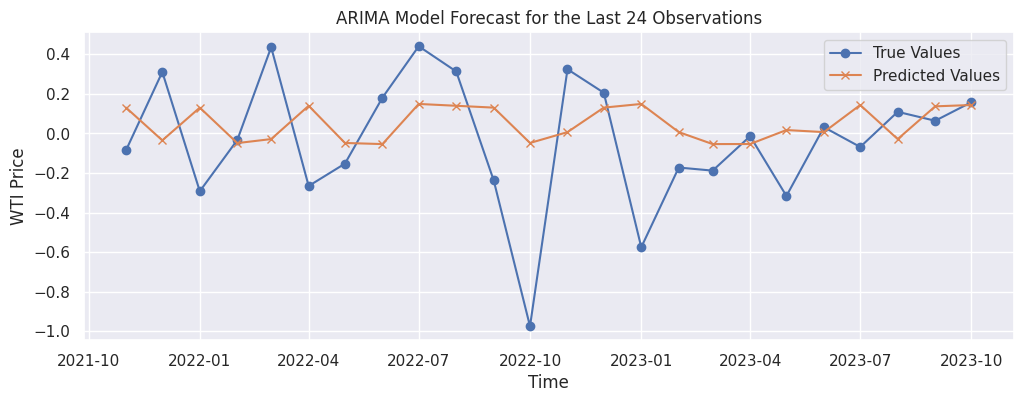

In [11]:
plotFor(results.y_test, results.predictions)

In [12]:
print(f"MAE: {calculateMAE(y_test, predictions):.4f}")
print(f"MAPE: {calculateMAPE(y_test, predictions):.4f} %")
print(f"MSE: {calculateMSE(y_test, predictions):.4f}")
print(f"RMSE: {calculateRMSE(y_test, predictions):.4f}")

MAE: 0.2599
MAPE: 118.8522 %
MSE: 0.1153
RMSE: 0.3396


## Saving Prediction

In [13]:
df = pd.DataFrame({'EUNG M XG': predictions, 'Actual': y_test})
df.to_excel("EUNG_M_XG_forecast.xlsx", index=True)
df

,EUNG M XG,Actual
DATE,,
2021-11-01,0.130576,-0.085031
2021-12-01,-0.035074,0.310788
2022-01-01,0.130576,-0.292332
2022-02-01,-0.048803,-0.033172
2022-03-01,-0.028540,0.436124
2022-04-01,0.139887,-0.265797
2022-05-01,-0.048150,-0.152693
2022-06-01,-0.053818,0.181046
2022-07-01,0.149169,0.440986


In [14]:
# Open a file in write mode
with open('EUNG M XG Results.txt', 'w') as file:
    # Write the variables to the file
    file.write(f'{calculateMAE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMAPE(y_test, predictions):.4f}\n')
    file.write(f'{calculateMSE(y_test, predictions):.4f}\n')
    file.write(f'{calculateRMSE(y_test, predictions):.4f}\n')